## What is pandas

Pandas stands for “Python Data Analysis Library

Pandas is quite a game changer when it comes to analyzing data with Python and it is one of the most preferred and widely used tools in data munging/wrangling if not THE most used one. 

Pandas is an open source, free to use (under a BSD license) and it was originally written by Wes McKinney 

What’s cool about Pandas is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called data frame that looks very similar to table in a statistical software (think Excel or SPSS for example. 

People who are familiar with R would see similarities to R too). 

This is so much easier to work with in comparison to working with lists and/or dictionaries through for loops or list comprehension 

Pandas allows importing data from various file formats such as 
-   comma-separated values, 
-   JSON, 
-   SQL, 
-   Microsoft Excel

Pandas allows various data manipulation operations such as 
-   merging
-   reshaping
-   selecting
-   data cleaning
-   data wrangling  
      -  Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.)

### this is how a pandas dataframe look like

dataframe is a tabular data structure with labeled rows and columns
as an example we see below the rows are indexed with an integer numbers. 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import skimage


## getting the list of available datasets

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR


In [4]:
car_crashes.tail(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


## measuring statistical values

In [5]:
stats = {}

stats['mean'] = car_crashes.ins_premium.mean()

stats['std'] = car_crashes.ins_premium.std()

stats['sum'] = car_crashes.ins_premium.sum()

stats['count'] = car_crashes.ins_premium.count()


stats['min'] = car_crashes.ins_premium.min()

stats['1st quantile'] = car_crashes.ins_premium.quantile(0.25) 

stats['median'] = car_crashes.ins_premium.median()

stats['3rd quantile'] = car_crashes.ins_premium.quantile(0.75)

stats['max'] = car_crashes.ins_premium.max()

pd.DataFrame(stats,index=['value']).T

,value
mean,886.957647
std,178.296285
sum,45234.840000
count,51.000000
min,641.960000
1st quantile,768.430000
median,858.970000
3rd quantile,1007.945000
max,1301.520000


In [6]:
flights = sns.load_dataset('flights')
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## changin index column
It doesn't have to be integers. 
Let's change it to a different column 

In [7]:
diamonds = sns.load_dataset('diamonds')
diamonds.set_index('cut').head(6)

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Ideal,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
Premium,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
Good,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
Premium,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
Good,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
Very Good,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [8]:
print('------------------------------------------------')
print(f'Data type: {type(diamonds)}')
print('------------------------------------------------')
print(f'Data size: {diamonds.shape}')
print('------------------------------------------------')

------------------------------------------------
Data type: <class 'pandas.core.frame.DataFrame'>
------------------------------------------------
Data size: (53940, 10)
------------------------------------------------


it allows easy extraction of data from within the dataframe. for example let's say we want to extract all samples with Good Cut

In [9]:
diamonds_cut_good = diamonds[diamonds.cut=='Good']

print('-----------------------------------------------------------')
print(f'number of diamonds with Good cut are: {diamonds_cut_good.shape[0]} / (out of {diamonds.shape[0]})')
print('-----------------------------------------------------------')

diamonds_cut_good.head()


-----------------------------------------------------------
number of diamonds with Good cut are: 4906 / (out of 53940)
-----------------------------------------------------------


,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71


## how to get the columns list

In [10]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## how to get the index list

In [11]:
diamonds.index

RangeIndex(start=0, stop=53940, step=1)

In [12]:
diamonds_cut_good.index

Int64Index([    2,     4,    10,    17,    18,    20,    35,    36,    37,
               42,
            ...
            53840, 53886, 53890, 53895, 53897, 53913, 53914, 53916, 53927,
            53936],
           dtype='int64', length=4906)

## slicing dataframs (just like numpy arrays & lists)

In [13]:
diamonds.iloc[100:103]

,carat,cut,color,clarity,depth,table,price,x,y,z
100,0.75,Very Good,D,SI1,63.2,56.0,2760,5.8,5.75,3.65
101,0.75,Premium,E,SI1,59.9,54.0,2760,6.0,5.96,3.58
102,0.74,Ideal,G,SI1,61.6,55.0,2760,5.8,5.85,3.59


## getting the dataframe summary

info gives us index type, number of columns, and columns type and number of non-null values 

In [14]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## broadcasting
pandas just like numpy support broadcasting. assigning a scaler value to a series or rows for one column assignes it to each of the selected rows

In [16]:
diamonds_modified = diamonds.copy()
diamonds_modified.loc[1:2,'carat'] = np.nan
diamonds_modified.head(4)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,NaN,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,NaN,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## what would happen if we try to add a new value to a categorical column?

In [17]:
# diamonds_modified.loc[1:2,'cut'] = 'something_something'


In [18]:
diamonds_modified.loc[1:2,'cut'] = 'Good'
diamonds_modified.head(4)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,NaN,Good,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,NaN,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## how to see the list of accepted categories

In [19]:
diamonds_modified.cut.unique().tolist()

['Ideal', 'Good', 'Premium', 'Very Good', 'Fair']

## To get the table info as numpy array we can use "values"

In [20]:
data = diamonds_modified[['carat','cut','clarity']].values

print('------------------------------------------------')
print(f'Data type: {type(data)}')
print(f'Data size: {data.shape}')
print('------------------------------------------------')

------------------------------------------------
Data type: <class 'numpy.ndarray'>
Data size: (53940, 3)
------------------------------------------------


# How to create our own dataframe

## 1. from csv file

In [21]:
df_probs = pd.read_csv('resbaz_probabilities.csv', index_col='Unnamed: 0')
df_probs.head(4)

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0.999993,0.390017,0.606140,0.972338,0.420952,0.750356,0.356778,0.550450,0.125451,0.737529,0.929790,0.086671,0.138679,0.854835
1,0.999984,0.222529,0.461594,0.910674,0.411723,0.614677,0.237674,0.452309,0.206217,0.743801,0.807649,0.125206,0.153524,0.718224
2,1.000000,0.011410,0.396175,0.964940,0.038394,0.470091,0.043038,0.197353,0.249219,0.166675,0.861830,0.002549,0.001014,0.501906
3,0.999933,0.247256,0.304753,0.810045,0.115635,0.780274,0.106563,0.291902,0.233191,0.682213,0.762753,0.031780,0.110215,0.585456


## 2. from dictionary

In [22]:
data = {'apple':[1,2,3],
        'peach':[0,2,5],
        'oranges':[2,0,1]}

pd.DataFrame(data,index=['picnic','brunch','dinner'])

,apple,peach,oranges
picnic,1,0,2
brunch,2,2,0
dinner,3,5,1


## 3. from lists

In [23]:
apple   = [1,2,3]
peach   = [0,2,5]
oranges = [2,0,1]

columns = ['apple','peach','oranges']
index   = ['picnic','brunch','dinner']
data    = [apple,peach,oranges]

METHOD = 2
if METHOD in (1,'directly from lists'):

    df = pd.DataFrame(data,columns=columns, index=index)

elif METHOD in (2,'using zip function'):

    data_and_columns = dict(zip(columns,data))

    df = pd.DataFrame(data_and_columns, index=index)

df

,apple,peach,oranges
picnic,1,0,2
brunch,2,2,0
dinner,3,5,1


## How to ad new column

In [24]:
METHOD = 2

if METHOD in (1,'broadcasting'):
    df['kiwi'] = 1

elif METHOD in (2,'another_list_of_same_size'):
    df['kiwi'] = [0,1,3]

df

,apple,peach,oranges,kiwi
picnic,1,0,2,0
brunch,2,2,0,1
dinner,3,5,1,3


## boradcasting can apply to inital dictionary too

In [25]:
data = {'apple':  [1,2,3],
        'peach':  [0,2,5],
        'oranges':[2,0,1],        
        'month':  'May',
        'year':   '2021'}

pd.DataFrame(data,index=index)

,apple,peach,oranges,month,year
picnic,1,0,2,May,2021
brunch,2,2,0,May,2021
dinner,3,5,1,May,2021


## plotting with pandas

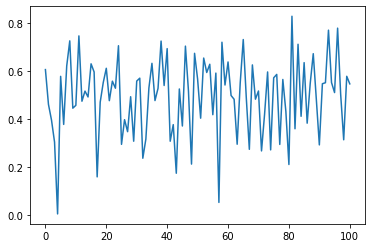

In [27]:

METHOD = 1

if METHOD in (1,'extraction using loc[indices]'):
    data = df_probs.loc[:100,'Cardiomegaly']

elif METHOD in (2,'extraction using iloc[indices]'):
    data = df_probs.Cardiomegaly.iloc[:100]

plt.plot(data)

In [28]:
df = sns.load_dataset('car_crashes').iloc[:10]
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


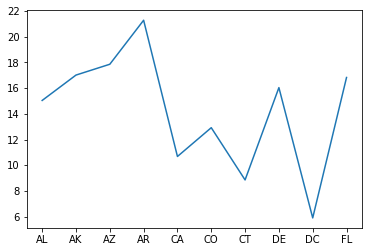

In [29]:
METHOD = 1

if METHOD in (1,'using pandas index as row indices'):
    data_series = df.set_index('abbrev')
    data_series = data_series.no_previous

    plt.plot( data_series )

elif METHOD in (3, 'setting row indices manually'):
    rows = df.abbrev
    data = df.no_previous
    plt.plot( rows , data )

## plotting directly with pandas

/Users/artinmac/.conda/envs/mlflow/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


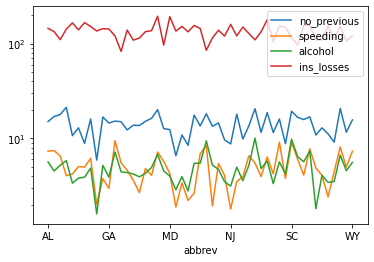

In [30]:
df = sns.load_dataset('car_crashes')

METHOD = 1

if METHOD in (1, 'plotting selected columns with respect to index list'):

    df2 = df.set_index('abbrev')
    df2[['no_previous','speeding','alcohol','ins_losses']].plot()
    plt.yscale('log')

elif METHOD in (2,'plotting series separately'):

    df2['no_previous'].plot(color='green', style='-',  legend=True)
    df2['speeding'].plot(   color='blue',  style='-',  legend=True)
    df2['alcohol'].plot(    color='red',   style='.-', legend=True)
    df2['ins_losses'].plot( color='black', style='.-', legend=True)
    plt.yscale('log')

elif METHOD in (3, 'plotting whole dataframe with respect to index list'):  

    df.plot(x='abbrev')
    plt.yscale('log')

## scatter plot

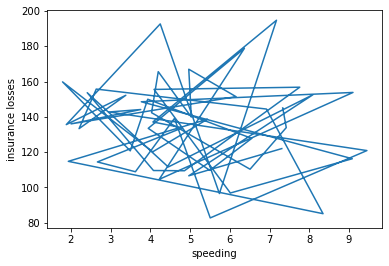

In [31]:
df = sns.load_dataset('car_crashes')

METHOD = 1
if METHOD in (1,'plotting a pandas series with respect to its indices'):

    df2 = df.set_index('speeding')
    df2['ins_losses'].plot()
    plt.ylabel('insurance losses')

elif METHOD in (2,'inserting column names as horizontal and vertical axis'):
    df.plot(x='speeding', y='ins_losses', kind='scatter')

## box plot

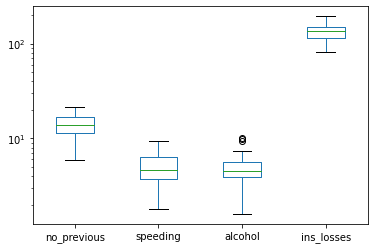

In [32]:
df = sns.load_dataset('car_crashes')

df.plot(y=['no_previous','speeding','alcohol','ins_losses'], kind='box')
plt.yscale('log')

## saving the plots

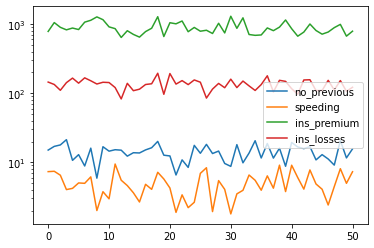

In [19]:
df = sns.load_dataset('car_crashes')

df[['no_previous','speeding','ins_premium','ins_losses']].plot()
plt.yscale('log')

plt.savefig('figure.jpg')
plt.savefig('figure.pdf')

## histogram

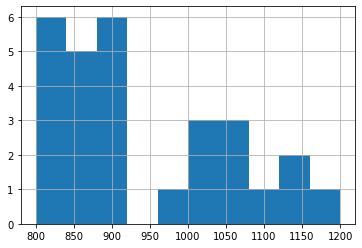

In [36]:

METHOD = 2

if METHOD in (1, 'using pd.plot(kind=hist)'):

    df2.plot(y='ins_premium', kind='hist', bins=10, range=(800,1200))


elif METHOD in (2, 'using pd.hist()'):

    df2.ins_premium.hist(bins=10, range=(800,1200))

##  cumulative density function (CDF)

<AxesSubplot:ylabel='Frequency'>

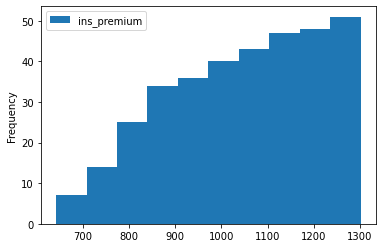

In [37]:
df2.plot(y='ins_premium', kind='hist', bins=10, cumulative=True)

# more matplotlib 

## reading image

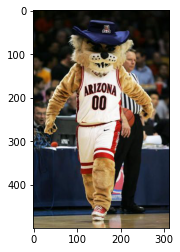

In [28]:
import matplotlib.pyplot as plt

image = plt.imread('figures/UA-mascot.jpg')

plt.imshow(image)
plt.show()

## Removing ticks and the axis by adding the command plt.axis("off")

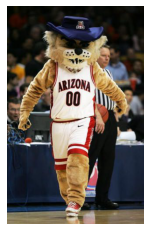

In [29]:
# import matplotlib.pyplot as plt
# image = plt.imread('figures/UA-mascot.jpg')

plt.imshow(image)
plt.axis('off')
plt.show()

## Adding grid

In [ ]:
# import matplotlib.pyplot as plt
# image = plt.imread('figures/UA-mascot.jpg')

plt.imshow(image)
plt.grid('on',which='major',axis='y')
plt.show()

## create a grid of figures

(-0.5, 1410.5, 1410.5, -0.5)

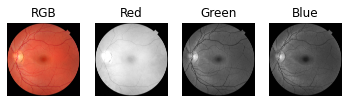

In [42]:
image = skimage.data.retina()

red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

plt.subplot(141).imshow(image)
plt.title('RGB')
plt.axis('off')

plt.subplot(142).imshow(red,cmap='gray')
plt.title('Red')
plt.axis('off')

plt.subplot(143).imshow(green,cmap='gray')
plt.title('Green')
plt.axis('off')

plt.subplot(144).imshow(blue,cmap='gray')
plt.title('Blue')
plt.axis('off')

# Practice
### Import a different image either from scikit-image package or your own image: 
        name: {camera, checkerboard, chelsea, horse, clock, coffee, ...}
        image = skimage.data.<name>()  

        image = plt.imread('path-to-image.jpeg')
        
### check the number of channels (RGB or Grayscale)
        if len(image.shape)==3 :  RGB
        if len(image.shape)==2 :  Grayscale

### convert to grayscale if its RGB
        gray_image = skimage.color.rgb2gray(image)

### Plot the new image
        plt.imshow(gray_image)
        plt.show()

## Suprresing color channels

(-0.5, 1410.5, 1410.5, -0.5)

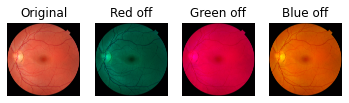

In [43]:
image = skimage.data.retina()

plt.subplot(141).imshow(image)
plt.title('Original')
plt.axis('off')

image2 = image.copy()
image2[:,:,0] = 0
plt.subplot(142).imshow(image2,cmap='gray')
plt.title('Red off')
plt.axis('off')

image2 = image.copy()
image2[:,:,1] = 0
plt.subplot(143).imshow(image2,cmap='gray')
plt.title('Green off')
plt.axis('off')

image2 = image.copy()
image2[:,:,2] = 0
plt.subplot(144).imshow(image2,cmap='gray')
plt.title('Blue off')
plt.axis('off')

# Tinting the image
Tint is an expression from colour theory and an often used technique by painters. 

A tint is where an artist adds a colour to white to create a lighter version of the colour. e.g., Pink is a tint created by adding white to red. 
A shade is where an artist adds black to a colour to darken it down.

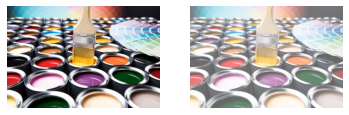

In [44]:
def tint_image(image=np.array([]) , percent=0.0):
    """    image: the image which will be shaded
           percent: a value between 0 (image will remain unchanged and 1 (image will completely white) """

    # normalizing the image
    image = image/255

    # image shape
    shape = image.shape

    # creating a white image
    white_image = np.ones(shape) 

    # tint the original image
    tinted_image = image + (white_image - image) * percent

    # outputing the tinted image
    return tinted_image


image = plt.imread('figures/paint.jpg')

new_image = tint_image(image=image, percent=0.4)

plt.subplot(121).imshow(image)
plt.axis("off")

plt.subplot(122).imshow(new_image)
plt.axis("off")
plt.show()

# shading the image
shade is an expression from colour theory and an often used technique by painters. 

A shade is where an artist adds black to a colour to darken it down.

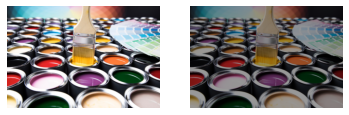

In [45]:
def shade_image(image=[], percent=0.0):
    """    image: the image which will be shaded
           percent: a value between 0 (image will remain unchanged and 1 (image will completely white) """

    # normalizing the image
    image = image/255

    # shade the original image
    shaded_image = image * (1 - percent)

    # outputing the shaded image
    return shaded_image

image = plt.imread('figures/paint.jpg')

new_image = shade_image(image, 0.4)

plt.subplot(121).imshow(image)
plt.axis("off")

plt.subplot(122).imshow(new_image)
plt.axis("off")
plt.show()

# I'm feeling creative
let's repeat what we did before but this time try to gradually increase the shading from left to right

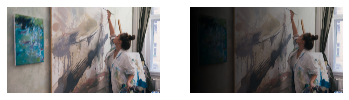

In [46]:
def feeling_artistic(image=[]):
    # Create a horizontal gradient line with the shape (1, image.shape[1], 3))
    # Use it as the percentage of shading for each column
    # apply it to the image

    # normalizing the image
    image = image/255

    # number of image columns
    number_of_columns = image.shape[1]

    """
    Returns `num` evenly spaced samples, calculated over the
        np.linspace(
            start,
            stop,
            num=50,
            endpoint=True,
            retstep=False,
            dtype=None,
            axis=0,
        )
    interval [`start`, `stop`].
    """
    horizontal_brush = np.linspace(0, 1, number_of_columns)

    # Checking if the image is RGB
    if (len(image.shape) > 2) and (image.shape[2] == 3):
        
        # Stack arrays in sequence depth wise (along third axis). Equivalent to concatenation along the third axis
        horizontal_brush = np.dstack((horizontal_brush, horizontal_brush, horizontal_brush))
    
    return image * horizontal_brush

image = plt.imread('figures/artist.jpg')

new_image = feeling_artistic(image)
plt.subplot(121).imshow(image,cmap='gray')
plt.axis("off")

plt.subplot(122).imshow(new_image,cmap='gray')
plt.axis("off")
plt.show()

# Histogram with matplotlib
Graphical representatio of amount of pixels for each intensity value:
Can be used for:
- image analysis
- segmentation (thresholding)
- Modify image brightness & Contrast

n, bins, patches = plt.hist()
- n: # of pixels in each bins
- patches: bins edges

Text(0.5, 1.0, 'Red')

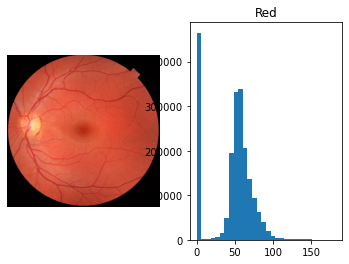

In [48]:
image = skimage.data.retina()

plt.grid(which='both')
plt.subplot(121).imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(122)
n, bins, _ = plt.hist(blue.ravel() , bins=30) # red , green , blue
plt.title('Red')


# Segmentation using threshold

## Global thresholding (e.g. from histgram information)


(-0.5, 1410.5, 1410.5, -0.5)

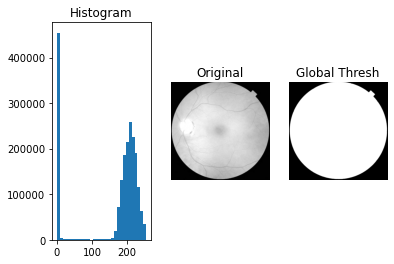

In [49]:
thresh = 150
mask = red > thresh 

plt.subplot(131)
n, bins, _ = plt.hist(red.ravel() , bins=30) # red , green , blue
plt.title('Histogram')

plt.subplot(132).imshow(red,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(133).imshow(mask,cmap='gray')
plt.title('Global Thresh')
plt.axis('off')

## Global: skimge built-in functions

(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

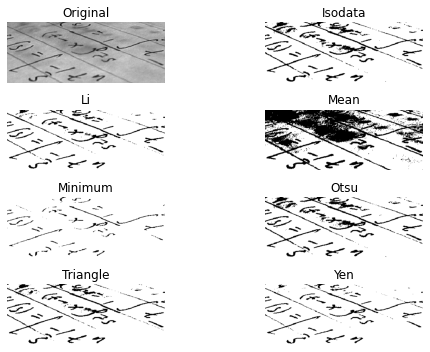

In [50]:
from skimage.filters import thresholding, try_all_threshold

image = skimage.data.text()

# mask_otsu     = thresholding.threshold_otsu(image)
# mask_isodata  = thresholding.threshold_isodata(image)
# mask_triangle = thresholding.threshold_triangle(image)

# Apply 7 different Global thresholding methods
try_all_threshold(image,verbose=0)

## Contrast Enhancment using OpenCV

Contrast Enhancment is useful in many cases. For example, in face recognition, before training the face data, the images of faces are histogram equalized to make them all with same lighting conditions.

You can see histogram doesn't cover the full spectrum. We need a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

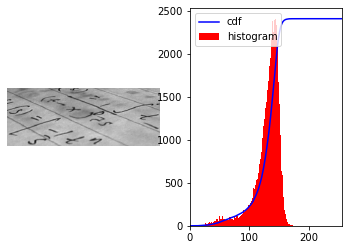

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = skimage.data.text()

hist,bins = np.histogram(image.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.subplot(121).imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.plot(cdf_normalized, color = 'b')

plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Find the minimum histogram value (excluding 0) and apply the histogram equalization equation 

In [56]:
# Mask an array where equal to a given value.
cdf_m = np.ma.masked_equal(x=cdf,value=0)

# normalizing the 
mx, mn = cdf_m.max() , cdf_m.min()
cdf_m = (cdf_m - mn)*255/(mx-mn)

# Return input as an array with masked data replaced by a fill value.
cdf = np.ma.filled(cdf_m,0).astype('uint8')

### Have the look-up table that gives us the information on what is the output pixel value for every input pixel value. So we just apply the transform.

In [57]:
print('look up table:',cdf)

new_image = cdf[image]

look up table: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1
   1   1   1   2   2   2   2   2   3   3   3   3   3   4   4   4   5   5
   5   5   6   6   6   7   7   7   7   8   8   8   8   9   9   9  10  10
  10  10  11  11  11  11  12  12  13  13  13  14  14  14  15  15  16  16
  17  17  18  18  19  20  20  21  22  23  23  24  25  26  27  28  29  31
  32  33  35  37  38  40  42  44  46  49  51  54  57  60  63  67  71  75
  79  83  88  93  98 104 109 115 121 128 134 142 149 157 164 172 180 188
 196 204 211 218 224 230 234 238 242 245 247 249 250 251 252 253 253 253
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255

### Plotting the new image

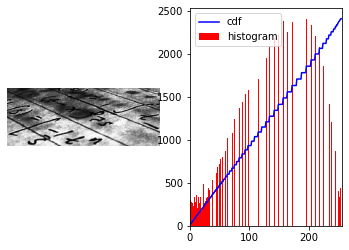

In [58]:

hist,bins = np.histogram(new_image.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


plt.subplot(121).imshow(new_image, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.plot(cdf_normalized, color = 'b')

plt.hist(new_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

## A much easier method: using open-cv built-in packages


$cv2.equalizeHist$ function equalizes the histogram of the input image (grayscale) using the following algorithm:
- Calculate the histogram $H$ for src .
- Normalize the histogram so that the sum of histogram bins is 255.
- Compute the integral of the histogram:
- Transform the image using a look-up table: $\texttt{dst}(x,y) = H'(\texttt{src}(x,y))$
- The algorithm normalizes the brightness and increases the contrast of the image.


(-0.5, 895.5, 171.5, -0.5)

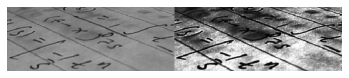

In [59]:
image = skimage.data.text()

equalized_image = cv2.equalizeHist(image)

# Stack arrays in sequence horizontally (column wise). 
# This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis.
res = np.hstack((image,equalized_image)) 

# writing the image 
# cv2.imwrite('res.png',res)

plt.imshow(res,cmap='gray')
plt.axis('off')

# some image processing techniques

## Local thresholding

Compute a threshold mask image based on local pixel neighborhood.

Also known as adaptive or dynamic thresholding. The threshold value is
the weighted mean for the local neighborhood of a pixel subtracted by a
constant. Alternatively the threshold can be determined dynamically by a
given function, using the 'generic' method.

Parameters
----------
image : (N, M) ndarray
    Input image.
block_size : int
    Odd size of pixel neighborhood which is used to calculate the
    threshold value (e.g. 3, 5, 7, ..., 21, ...).
method : {'generic', 'gaussian', 'mean', 'median'}, optional
    Method used to determine adaptive threshold for local neighbourhood in
    weighted mean image.

    * 'generic': use custom function (see ``param`` parameter)
    * 'gaussian': apply gaussian filter (see ``param`` parameter for custom sigma value)
    * 'mean': apply arithmetic mean filter
    * 'median': apply median rank filter

    By default the 'gaussian' method is used.
offset : float, optional
    Constant subtracted from weighted mean of neighborhood to calculate
    the local threshold value. Default offset is 0.
mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The mode parameter determines how the array borders are handled, where
    cval is the value when mode is equal to 'constant'.
    Default is 'reflect'.
param : {int, function}, optional
    Either specify sigma for 'gaussian' method or function object for
    'generic' method. This functions takes the flat array of local
    neighbourhood as a single argument and returns the calculated
    threshold for the centre pixel.
cval : float, optional
    Value to fill past edges of input if mode is 'constant'.

Returns
-------
threshold : (N, M) ndarray
    Threshold image. All pixels in the input image higher than the
    corresponding pixel in the threshold image are considered foreground.


Examples
--------
> from skimage.data import camera

> image = camera()\[:50, :50\]

> binary_image1 = image > threshold_local(image, 15, 'mean')

> func = lambda arr: arr.mean()

> binary_image2 = image > threshold_local(image, 15, 'generic',

(-0.5, 447.5, 171.5, -0.5)

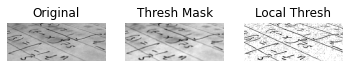

In [60]:
from skimage.filters import threshold_local

image = skimage.data.text()

thresh = threshold_local(image, block_size=9, offset=5, mode='nearest')

plt.subplot(131).imshow(image,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(132).imshow(thresh,cmap='gray')
plt.title('Thresh Mask')
plt.axis('off')

plt.subplot(133).imshow(image > thresh,cmap='gray')
plt.title('Local Thresh')
plt.axis('off')

## Filtering

(-0.5, 639.5, 426.5, -0.5)

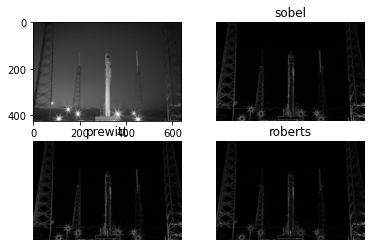

In [54]:
from skimage.filters import sobel, prewitt, roberts

image = skimage.data.rocket()
image = skimage.color.rgb2gray(image)

edge_sobel   = sobel(image)
edge_prewitt = prewitt(image)
edge_roberts = roberts(image)

plt.subplot(221).imshow(image,cmap='gray')
plt.axis('Image')

plt.subplot(222).imshow(edge_sobel,cmap='gray')
plt.title('sobel')
plt.axis('off')

plt.subplot(223).imshow(edge_prewitt,cmap='gray')
plt.title('prewitt')
plt.axis('off')

plt.subplot(224).imshow(edge_roberts,cmap='gray')
plt.title('roberts')
plt.axis('off')

## Smoothing

Signature:
 skimage.filters.gaussian(
    image,
    sigma=1,
    output=None,
    mode='nearest',
    cval=0,
    multichannel=None,
    preserve_range=False,
    truncate=4.0,
)
Docstring:
Multi-dimensional Gaussian filter.

Parameters
----------
- image : array-like
    Input image (grayscale or color) to filter.

- sigma : scalar or sequence of scalars, optional
    Standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a  sequence, or as a single number, in which case it is equal for all axes.

- output : array, optional
    The ``output`` parameter passes an array in which to store the filter output.

- mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The ``mode`` parameter determines how the array borders are handled, where ``cval`` is the value when mode is equal to   'constant'. Default is 'nearest'.

- cval : scalar, optional
    Value to fill past edges of input if ``mode`` is 'constant'. Defaultis 0.0

- multichannel : bool, optional (default: None)
    Whether the last axis of the image is to be interpreted as multiple channels. If True, each channel is filtered separately (channels are not mixed together). Only 3 channels are supported. If ``None``, the function will attempt to guess this, and raise a warning if ambiguous, when the array has shape (M, N, 3).

- preserve_range : bool, optional
    Whether to keep the original range of values. Otherwise, the input image is converted according to the conventions of ``img_as_float``.
    
- truncate : float, optional
    Truncate the filter at this many standard deviations.

Returns
-------
- filtered_image : ndarray

Notes
-----
This function is a wrapper around :func:`scipy.ndi.gaussian_filter`.

Integer arrays are converted to float.

The ``output`` should be floating point data type since gaussian converts
to float provided ``image``. If ``output`` is not provided, another array
will be allocated and returned as the result.

The multi-dimensional filter is implemented as a sequence of
one-dimensional convolution filters. The intermediate arrays are
stored in the same data type as the output. Therefore, for output
types with a limited precision, the results may be imprecise
because intermediate results may be stored with insufficient
precision.


(-0.5, 399.5, 327.5, -0.5)

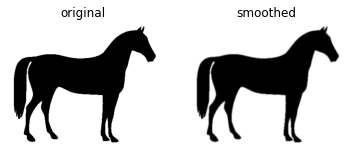

In [52]:
from skimage.filters import gaussian

image = skimage.data.horse()

smoothed_image = gaussian(image)

plt.subplot(121).imshow(image,cmap='gray')
plt.title('original')
plt.axis('off')

plt.subplot(122).imshow(smoothed_image,cmap='gray')
plt.title('smoothed')
plt.axis('off')

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

The method we just looked at considers the global contrast. But we can lose information due to over-brightness if the histogram is not confined to a particular region.

## Problem
Note: Global Histogram equalization is good when histogram of the image is confined to a particular region. It won’t work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present. 

## Solution
adaptive histogram equalization: 
- Image will be divided into small blocks called “tiles” (default tileSize = 8x8). 
- Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region - 
- If a tile has too much noise the same problem with global histogram for that tile might happen, so to avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. 
- After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

(-0.5, 1343.5, 171.5, -0.5)

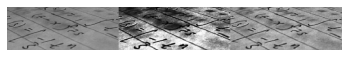

In [61]:

image = skimage.data.text()

""" Creates a smart pointer to a cv::CLAHE class and initializes it.
        clipLimit: Threshold for contrast limiting.
        tileGridSize: Size of grid for histogram equalization. 
                      Input image will be divided into equally sized rectangular tiles. 
                      TileGridSize defines the number of tiles in row and column. """
                      
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

equalized_image_adaptive = clahe.apply(image)

res = np.hstack( (image, equalized_image, equalized_image_adaptive) ) 

plt.imshow(res,cmap='gray')
plt.axis('off')

# Segmentation using threshold

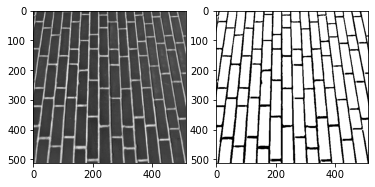

In [62]:
image = skimage.data.brick()

""" The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    values. There are several types of thresholding supported by the function. They are determined by type parameter.

    Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    above values. In these cases, the function determines the optimal threshold value using the Otsu's
    or Triangle algorithm and uses it instead of the specified thresh. """
ret, mask = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121).imshow(image,cmap='gray')
plt.subplot(122).imshow(mask,cmap='gray')
plt.show()

# Morphology with OpenCV


> erode(src, kernel, dst, anchor, iterations, borderType, borderValue) -> dst

> dialte(src, kernel, dst, anchor, iterations, borderType, borderValue) -> dst

> morphologyEx(src, kernel, dst, anchor, iterations, borderType, borderValue) -> dst

The function supports the in-place mode. Erosion can be applied several ( iterations ) times. In
case of multi-channel images, each channel is processed independently.
   
- src input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- dst output image of the same size and type as src.
- kernel structuring element used for erosion; if `element=Mat()`, a `3 x 3` rectangular structuring element is used. Kernel can be created using #getStructuringElement.
- anchor position of the anchor within the element; default value (-1, -1) means that the .   anchor is at the element center.
- iterations number of times erosion is applied.
- borderType pixel extrapolation method, see #BorderTypes. #BORDER_WRAP is not supported.
- borderValue border value in case of a constant border

Text(0.5, 1.0, 'closing')

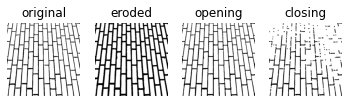

In [63]:
# structuring element
kernel = np.ones((3,3),np.uint8)

# The function erodes the source image using the specified structuring element
erosion = cv2.erode(mask,kernel,iterations = 2)

# The function dilates the source image using the specified structuring element
dilation = cv2.erode(mask,kernel,iterations = 2)

# Opening: erosion followed by dilation
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel, iterations = 2)

# Closing: dilation followed by erotion
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel, iterations = 2)

plt.subplot(141).imshow(mask, cmap='gray')
plt.axis('off')
plt.title('original')

plt.subplot(142).imshow(erosion, cmap='gray')
plt.axis('off')
plt.title('eroded')

plt.subplot(143).imshow(opening, cmap='gray')
plt.axis('off')
plt.title('opening')

plt.subplot(144).imshow(closing, cmap='gray')
plt.axis('off')
plt.title('closing')


## Connected components analysis

>> connectedComponents(image, labels, connectivity, ltype) -> retval, labels


- image the 8-bit single-channel image to be labeled
- labels destination labeled image
- connectivity 8 or 4 for 8-way or 4-way connectivity respectively
- ltype output image label type. Currently CV_32S and CV_16U are supported.


Text(0.5, 1.0, 'opjects')

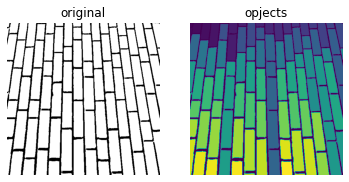

In [64]:
# Marker labelling
ret, markers = cv2.connectedComponents(image=mask, connectivity=4)

plt.subplot(121).imshow(mask, cmap='gray')
plt.axis('off')
plt.title('original')

plt.subplot(122).imshow(markers)
plt.axis('off')
plt.title('opjects')